# Week 10 Day 2: Runge–Kutta algorithm

## Objectives

Work through a problem by implementing the RK2 algorithm!

First let's rewrite the Euler code from last time, with a few changes to make this more general and adaptable:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We can rewrite our harmonic motion equation in terms of $\mathbf{f}(t, \mathbf{y}) = \dot{\mathbf{y}}$, where this is in the standard form:

$$
\mathbf{y} =
\left(
\begin{matrix}
\dot{x} \\
x
\end{matrix}
\right)
$$

$$
\mathbf{f}(t, \mathbf{y}) =
\dot{\mathbf{y}}
=
\left(
\begin{matrix}
\ddot{x} \\
\dot{x}
\end{matrix}
\right)
=
\left(
\begin{matrix}
-\frac{k}{m} x \\
\dot{x}
\end{matrix}
\right)
=
\left(
\begin{matrix}
-\frac{k}{m} y_1 \\
y_0
\end{matrix}
\right)
$$

In [2]:
x_max = 1  # Size of x max
v_0 = 0
koverm = 1  # k / m


def f(t, y):
    "Y has two elements, x and v"
    return np.array([-koverm * y[1], y[0]])

In [3]:
def euler_ivp(f, init_y, t):
    steps = len(t)
    order = len(init_y)  # Number of equations

    y = np.empty((steps, order))
    y[0] = init_y  # Note that this sets the elements of the first row

    for n in range(steps - 1):
        h = t[n + 1] - t[n]

        # Copute dydt based on *current* position
        dydt = f(t[n], y[n])

        # Compute next velocity and position
        y[n + 1] = y[n] - dydt * h

    return y

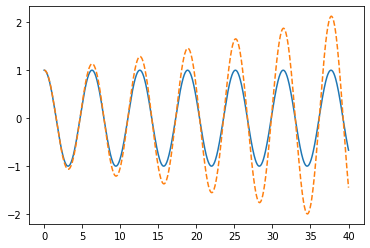

In [4]:
ts = np.linspace(0, 40, 1000 + 1)
y = euler_ivp(f, [x_max, v_0], ts)
plt.plot(ts, np.cos(ts))
plt.plot(ts, y[:, 0], "--")

## Range-Kutta introduction

Note that $h =  t_{n+1} - t_n $.

$$
\dot{y} = f(t,y)
\\
\implies y = \int f(t,y) \, dt
\\
\implies y_{n+1} = y_{n} + \int_{t_n}^{t_{n+1}} f(t,y) \, dt
$$

Now, expand $f$ in a Taylor series around the *midpoint* of the interval:

$$
f(t,y) \approx  f(t_{n+\frac{1}{2}},y_{n+\frac{1}{2}})
       + \left( t - t_{n+\frac{1}{2}}\right)
       \dot{f}(t_{n+\frac{1}{2}})
       + \mathcal{O}(h^2)
$$

The second term here is symmetric in the interval, so all we have left is the first term in the integral:

$$
\int_{t_n}^{t_{n+1}} f(t,y) \, dt \approx
    h\, f(t_{n+\frac{1}{2}},y_{n+\frac{1}{2}}) + \mathcal{O}(h^3)
$$

Back into the original statement, we get:

$$
y_{n+1} \approx
\color{blue}{
y_{n}
+ h\, f(t_{n+\frac{1}{2}},y_{n+\frac{1}{2}})
}
+ \mathcal{O}(h^3)
\tag{rk2}
$$

We've got one more problem! How do we calculate $f(t_{n+\frac{1}{2}},y_{n+\frac{1}{2}})$? We can use the Euler's algorithm that we saw last time:

$$
y_{n+\frac{1}{2}}
\approx y_n + \frac{1}{2} h \dot{y}
= \color{red}{
y_n + \frac{1}{2} h f(t_{n},y_{n})
}
$$

Putting it together, this is our RK2 algorithm:

$$
\mathbf{y}_{n+1} \approx
\color{blue}{
\mathbf{y}_{n}
+ \mathbf{k}_2
}
\tag{1.0}
$$


$$
\mathbf{k}_1 = h \mathbf{f}(t_n,\, \mathbf{y}_n)
\tag{1.1}
$$

$$
\mathbf{k}_2 = h \mathbf{f}(t_n + \frac{h}{2},\, \color{red}{\mathbf{y}_n
+ \frac{\mathbf{k}_1}{2}})
\tag{1.2}
$$

Like the book, we've picked up bold face to indicate that we can have a vector of ODEs.

In [5]:
def rk2_ivp(f, init_y, t):
    steps = len(t)
    order = len(init_y)

    y = np.empty((steps, order))
    y[0] = init_y

    for n in range(steps - 1):
        h = t[n + 1] - t[n]

        k1 = h * f(t[n], y[n])  # 1.1
        k2 = h * f(t[n] + h / 2, y[n] + k1 / 2)  # 1.2

        y[n + 1] = y[n] + k2  # 1.0

    return y

Let's try this with the same grid as before:

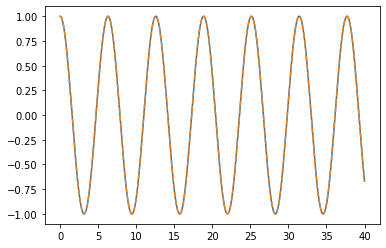

In [6]:
ts = np.linspace(0, 40, 1000 + 1)
y = rk2_ivp(f, [x_max, v_0], ts)
plt.plot(ts, np.cos(ts))
plt.plot(ts, y[:, 0], "--")

And, on a coarser grid:

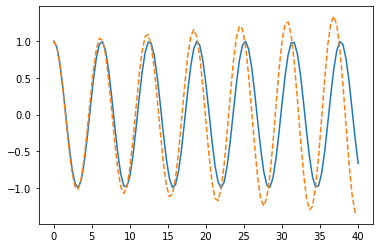

In [7]:
ts = np.linspace(0, 40, 100 + 1)
y = rk2_ivp(f, [x_max, v_0], ts)
plt.plot(ts, np.cos(ts))
plt.plot(ts, y[:, 0], "--")

We can get the RK4 algorithm by keeping another non-zero term in the Taylor series:

$$
\mathbf{y}_{n+1} \approx
\mathbf{y}_{n}
+ \frac{1}{6} (\mathbf{k}_1 + 2 \mathbf{k}_2 + 2 \mathbf{k}_3 + \mathbf{k}_4 )
\tag{2.0}
$$

$$
\mathbf{k}_1 = h \mathbf{f}(t_n,\, \mathbf{y}_n)
\tag{2.1}
$$

$$
\mathbf{k}_2 = h \mathbf{f}(t_n + \frac{h}{2},\,
                            \mathbf{y}_n + \frac{\mathrm{k}_1}{2})
\tag{2.2}
$$

$$
\mathbf{k}_3 = h \mathbf{f}(t_n + \frac{h}{2},\,
                            \mathbf{y}_n + \frac{\mathrm{k}_2}{2})
\tag{2.3}
$$

$$
\mathbf{k}_4 = h \mathbf{f}(t_n + h,\,
                            \mathbf{y}_n + \mathrm{k}_3)
\tag{2.4}
$$

In [8]:
def rk4_ivp(f, init_y, t):
    steps = len(t)
    order = len(init_y)

    y = np.empty((steps, order))
    y[0] = init_y

    for n in range(steps - 1):
        h = t[n + 1] - t[n]

        k1 = h * f(t[n], y[n])  # 2.1
        k2 = h * f(t[n] + h / 2, y[n] + k1 / 2)  # 2.2
        k3 = h * f(t[n] + h / 2, y[n] + k2 / 2)  # 2.3
        k4 = h * f(t[n] + h, y[n] + k3)  # 2.4

        y[n + 1] = y[n] + 1 / 6 * (k1 + 2 * k2 + 2 * k3 + k4)  # 2.0

    return y

Let's try this with the same grid as before:

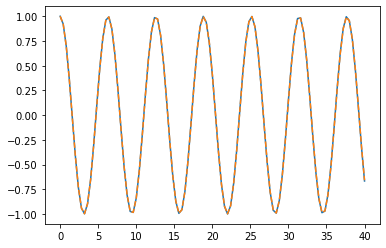

In [9]:
ts = np.linspace(0, 40, 100 + 1)
y = rk4_ivp(f, [x_max, v_0], ts)
plt.plot(ts, np.cos(ts))
plt.plot(ts, y[:, 0], "--")

#### Bonus: Performance boost

In [10]:
%%timeit
ts = np.linspace(0, 40, 1000 + 1)
y = rk4_ivp(f, [x_max, v_0], ts)

27 ms ± 729 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Let's JIT both of these functions, and see if we can get a speedup!

In [11]:
import numba

f_jit = numba.njit(f)
rk4_ivp_jit = numba.njit(rk4_ivp)

In [12]:
%%timeit
ts = np.linspace(0, 40, 1000 + 1)
y = rk4_ivp_jit(f_jit, [x_max, v_0], ts)

/usr/share/miniconda/envs/compclass/lib/python3.7/site-packages/numba/ir_utils.py:2041: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'init_y' of function 'rk4_ivp'.

For more information visit http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "<ipython-input-8-4a023190d09d>", line 1:
def rk4_ivp(f, init_y, t):
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


914 µs ± 120 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


How's that for almost 0 effort!

### RK 4(5)

This is the "adaptive" step solver from the book. It's a bit more readable, and a logical error was fixed. The definition of the tolerance seems to be different than scipy.

In [13]:
def rk45_ivp(f, init_y, t_range, tol=1e-8, attempt_steps=20):
    order = len(init_y)  # Number of equations

    y = [np.array(init_y)]
    t = [t_range[0]]
    err_sum = 0

    # Step size and limits to step size
    h = (t_range[1] - t_range[0]) / attempt_steps
    hmin = h / 64
    hmax = h * 64

    while t[-1] < t_range[1]:

        # Last step should just be exactly what is needed to finish
        if t[-1] + h > t_range[1]:
            h = t_range[1] - t[-1]

        # Compute k1 - k6 for evaluation and error estimate
        k1 = h * f(t[-1], y[-1])
        k2 = h * f(t[-1] + h / 4, y[-1] + k1 / 4)
        k3 = h * f(t[-1] + 3 * h / 8, y[-1] + 3 * k1 / 32 + 9 * k2 / 32)
        k4 = h * f(
            t[-1] + 12 * h / 13,
            y[-1] + 1932 * k1 / 2197 - 7200 * k2 / 2197 + 7296 * k3 / 2197,
        )
        k5 = h * f(
            t[-1] + h,
            y[-1] + 439 * k1 / 216 - 8 * k2 + 3680 * k3 / 513 - 845 * k4 / 4104,
        )
        k6 = h * f(
            t[-1] + h / 2,
            y[-1]
            + 8 * k1 / 27
            + 2 * k2
            - 3544 * k3 / 2565
            + 1859 * k4 / 4104
            - 11 * k5 / 40,
        )

        # Compute error from higher order RK calculation
        err = np.abs(
            k1 / 360 - 128 * k3 / 4275 - 2197 * k4 / 75240 + k5 / 50 + 2 * k6 / 55
        )

        # Compute factor to see if step size should be changed
        s = 0 if err[0] == 0 or err[1] == 0 else 0.84 * (tol * h / err[0]) ** 0.25

        lower_step = s < 0.75 and h > 2 * hmin
        raise_step = s > 1.5 and 2 * h < hmax
        no_change = not raise_step and not lower_step

        # Accept step and move on
        if err[0] < tol or err[1] < tol or no_change:
            y.append(
                y[-1] + 25 * k1 / 216 + 1408 * k3 / 2565 + 2197 * k4 / 4104 - k5 / 5
            )
            t.append(t[-1] + h)

        # Grow or shrink the step size if needed
        if lower_step:
            h /= 2
        elif raise_step:
            h *= 2

    return np.array(t), np.array(y)

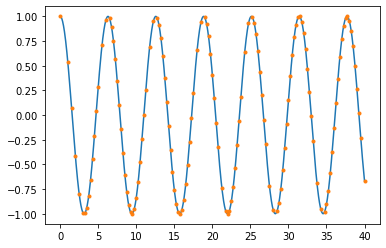

In [14]:
ts = np.linspace(0, 40, 1000 + 1)
t, y = rk45_ivp(f, [x_max, v_0], [0, 40], 0.005)
plt.plot(ts, np.cos(ts))
plt.plot(t, y[:, 0], ".")

Let's compare it with the scipy algorithm:

In [15]:
import scipy.integrate

In [16]:
r45 = scipy.integrate.solve_ivp(f, [0, 40], [x_max, v_0], rtol=0.00001)

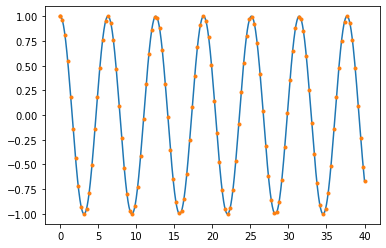

In [17]:
r45
plt.plot(ts, np.cos(ts))
plt.plot(r45.t, r45.y[0], ".")